# Random labels
Train WideResnet model with different probability of the training labels to be random.
prob_random=1.0 means the labels are totally random. 

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import time
import json
import pandas as pd
import copy
import sys
%run ./result_summary.ipynb
%run ./plot_functions.ipynb
sys.path.insert(0, '../src/')

output_path =  ../output/figures
plt = single_column_plt_params(plt)


In [2]:
from analyze_utilities import *
from dataset_utilities import create_cifar10_dataloaders
plt = single_column_plt_params(plt)

Files already downloaded and verified
Files already downloaded and verified


In [3]:
# Extract the log normalization factor
random_df = pd.DataFrame(columns=['nml_acc', 'erm_acc', 'genie_acc',
                                  'log10_norm_factor',
                                  'nml_mean_loss', 'erm_mean_loss', 'genie_mean_loss'])

for (rand_prob_single, file_random) in zip(random_prob, files_random):
    results_df, statistics_df = load_results_to_df(file_random)
    print('Random Prob = {}, num={}'.format(
        rand_prob_single, results_df.shape[0]))
    random_df.loc[rand_prob_single] = [statistics_df.loc['acc']['nml'],
                                       statistics_df.loc['acc']['erm'],
                                       statistics_df.loc['acc']['genie'],
                                       results_df['log10_norm_factor'].mean(),
                                       statistics_df.loc['mean loss']['nml'],
                                       statistics_df.loc['mean loss']['erm'],
                                       statistics_df.loc['mean loss']['genie']]
print('Random df:')
random_df.transpose().round(2)

Random Prob = 0.0, num=300
Random Prob = 0.2, num=300
Random Prob = 0.4, num=300
Random Prob = 0.6, num=300
Random Prob = 0.8, num=300
Random Prob = 1.0, num=300
Random df:


,0.0,0.2,0.4,0.6,0.8,1.0
nml_acc,0.85,0.74,0.47,0.30,0.17,0.09
erm_acc,0.84,0.72,0.46,0.31,0.15,0.09
genie_acc,1.00,0.99,0.99,0.98,0.93,0.86
log10_norm_factor,0.49,0.81,0.86,0.91,0.90,0.89
nml_mean_loss,0.49,0.83,0.90,0.97,1.12,1.28
erm_mean_loss,0.51,1.00,2.63,3.67,5.49,6.29
genie_mean_loss,0.01,0.02,0.04,0.06,0.21,0.40


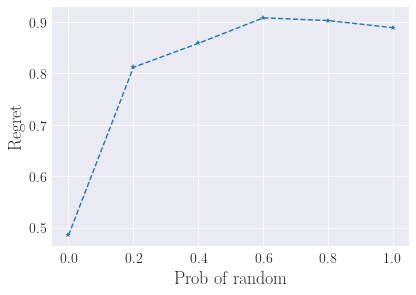

In [4]:
# Plot
plt.plot(random_df.index.values,
         random_df['log10_norm_factor'], '--*', label='NML')
plt.ylabel('Regret')
plt.xlabel('Prob of random')
plt.title('Regret Vs. Prob to be Random') if is_plot_title else None
# plt.savefig(os.path.join(output_path, 'figure_random_prob_regret.jpg'),
#             dpi=200, bbox_inches=plt.tight_layout()) if is_save_fig else None
plt.show()

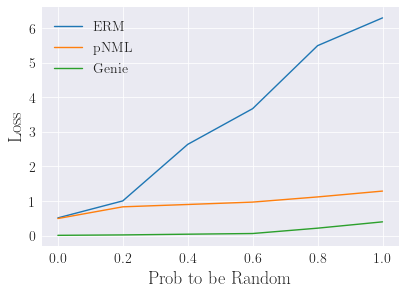

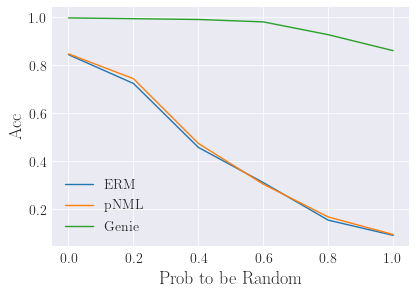

In [5]:
# Check noisy data
plt.plot(random_df.index.values, random_df['erm_mean_loss'], label='ERM')
plt.plot(random_df.index.values, random_df['nml_mean_loss'], label='pNML')
plt.plot(random_df.index.values, random_df['genie_mean_loss'], label='Genie')
plt.title('Loss of random labels') if is_plot_title else None
plt.ylabel('Loss')
plt.xlabel('Prob to be Random')
plt.legend()
# plt.savefig(os.path.join(output_path, 'figure_random_prob_loss.pdf'), dpi=300,
#             bbox_inches=plt.tight_layout()) if is_save_fig else None
plt.show()

plt.plot(random_df.index.values, random_df['erm_acc'], label='ERM')
plt.plot(random_df.index.values, random_df['nml_acc'], label='pNML')
plt.plot(random_df.index.values, random_df['genie_acc'], label='Genie')
plt.title('Acc of random labels') if is_plot_title else None
plt.ylabel('Acc')
plt.xlabel('Prob to be Random')
plt.legend()
# plt.savefig(os.path.join(output_path, 'figure_random_prob_acc.pdf'), dpi=300,
#             bbox_inches=plt.tight_layout()) if is_save_fig else None
plt.show()

# Regret Historams

0.0
0.2
Random Prob = 0.2, num=300


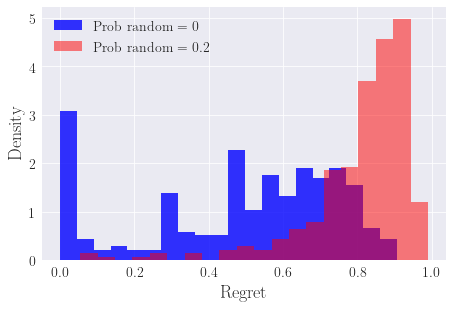

0.4
Random Prob = 0.4, num=300


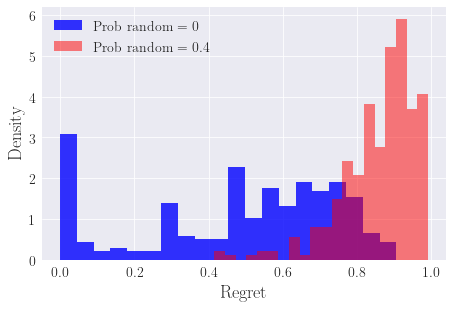

0.6
Random Prob = 0.6, num=300


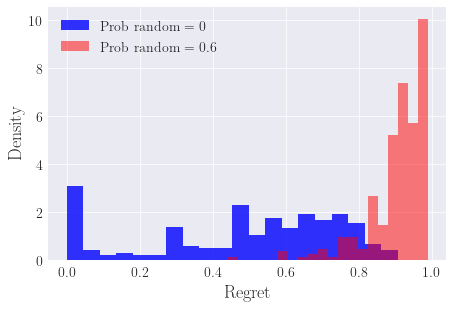

0.8
Random Prob = 0.8, num=300


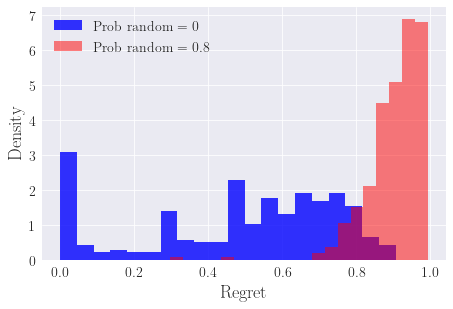

1.0
Random Prob = 1.0, num=300


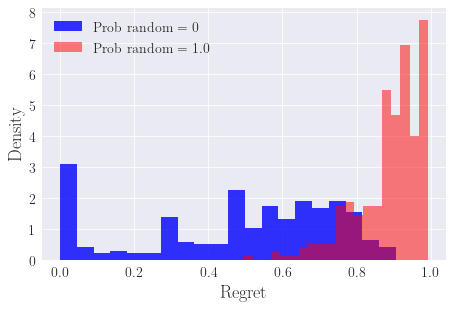

In [20]:
bins = 20
result_prob_0_df, _ = load_results_to_df(files_random[0])
for (rand_prob_single, file_random) in zip(random_prob, files_random):
    print(rand_prob_single)
    if float(rand_prob_single) == 0:
        continue
    results_df, _ = load_results_to_df(file_random)
    print('Random Prob = {}, num={}'.format(
        rand_prob_single, results_df.shape[0]))

    plt.hist(result_prob_0_df['log10_norm_factor'], alpha=0.8, bins=bins,
             density=True, color='blue', label='Prob random = 0')
    plt.hist(results_df['log10_norm_factor'], alpha=0.5, bins=bins,
             density=True, color='red',  label='Prob random = {}'.format(rand_prob_single))
    plt.xlabel('Regret')
    plt.ylabel('Density')
    plt.legend()
    plt.savefig(os.path.join(output_path, 'figure_random_prob_{}_regret_hist.pdf'.format(int(10*rand_prob_single))), dpi=300,
                bbox_inches=plt.tight_layout()) if is_save_fig else None
    plt.show()

# Evaluate number of parameters

In [6]:
# Count param difference between WideResnet and Resnet20
from wide_resnet import WideResNet
from resnet import resnet20

model = WideResNet()
wide_resnet_params = sum(p.numel() for p in model.parameters())
model = resnet20()
resnet20_params = sum(p.numel() for p in model.parameters())
print('[WideResnet Resnet20]=[{} {}]'.format(
    wide_resnet_params, resnet20_params))
print('Ratio {}]'.format(wide_resnet_params / resnet20_params))

[WideResnet Resnet20]=[369498 269722]
Ratio 1.3699216230044269]
